## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [20]:
import numpy as np
from numpy.linalg import *
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# print(x_train[0])

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [23]:
## Your code HERE
class1 = []
class2 = []
for index in range(x_train.shape[0]):
  if y_train[index] == 0:
    class1.append(x_train[index])
    # print(x_train[index])
    # print(np.sum(class1))
  else:
    class2.append(x_train[index])

m1 = np.zeros((1, x_train.shape[1]))
m2 = np.zeros((1, x_train.shape[1]))
m1[0] = np.sum(class1, axis = 0) / len(class1)
m2[0] = np.sum(class2, axis = 0) / len(class2)
m = [m1, m2]
# print(m)

In [24]:
print(f"mean vector of class 1: \n{m1[0]}", f"\nmean vector of class 2: \n{m2[0]}")

mean vector of class 1: 
[ 0.99253136 -0.99115481] 
mean vector of class 2: 
[-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [25]:
## Your code HERE
Sw = np.zeros((2, x_train.shape[1], x_train.shape[1]))
for i in range(x_train.shape[0]):
  Sw[y_train[i]] = Sw[y_train[i]] + (x_train[i] - m[y_train[i]]).T @ (x_train[i] - m[y_train[i]])
sw = Sw[0] + Sw[1]



In [26]:
print(f"Within-class scatter matrix SW: \n{sw}")

Within-class scatter matrix SW: 
[[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [27]:
## Your code HERE
sb = (m2 - m1).T @ (m2 - m1)

In [28]:
print(f"Between-class scatter matrix SB: \n{sb}")

Between-class scatter matrix SB: 
[[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [29]:
## Your code HERE
w1 = inv(sw) @ (m2 - m1).T
w = w1 / norm(inv(sw) @ (m2 - m1).T)

In [30]:
print(f" Fisher’s linear discriminant: \n{w1}")
print(f" After Normalization: \n{w}")

 Fisher’s linear discriminant: 
[[-0.000224  ]
 [ 0.00056237]]
 After Normalization: 
[[-0.37003809]
 [ 0.92901658]]


In [31]:
# KNN

x_train_dot = x_train @ w
x_test_dot = x_test @ w
y_pred = [[] for i in range(5)]

for i in range(len(x_test_dot)):
  dist_dict = {}
  for j in range(len(x_train_dot)):
    dist_dict[j] = np.absolute(x_train_dot[j] - x_test_dot[i])
  sorted_dist = sorted(dist_dict.items(), key = lambda x : x[1])
  for k in range(5):
    c1 = 0
    c2 = 0
    nearest = -1
    for index_dist in sorted_dist:
      if y_train[index_dist[0]] == 0:
        c1 += 1
      else:
        c2 += 1
      if c1 + c2 == 1:
        nearest = y_train[index_dist[0]]
      if c1 + c2 == k + 1:
        break
    if c1 > c2:
      y_pred[k].append(0)
    elif c1 == c2:
      y_pred[k].append(nearest)
    else:
      y_pred[k].append(1)
      

## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [32]:
acc = [0 for i in range(5)]
for k in range(5):
  acc[k] = accuracy_score(y_test, y_pred[k])

In [33]:
for k in range(5):
  print(f"Accuracy of test-set when k = {k + 1}: {acc[k]}")

Accuracy of test-set when k = 1: 0.8488
Accuracy of test-set when k = 2: 0.8488
Accuracy of test-set when k = 3: 0.8792
Accuracy of test-set when k = 4: 0.8824
Accuracy of test-set when k = 5: 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

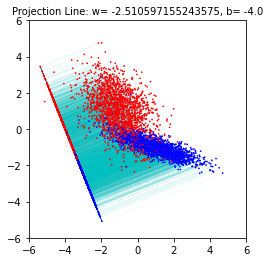

In [36]:
vec = [w[0][0], w[1][0]]
proj_x_train = []
for i in range(len(x_train_dot)):
  proj_x_train.append(x_train_dot[i] * vec)
m = vec[1] / vec[0]
a = -4 / 1.1586521402579473
c = []
for i in range(len(y_train)):
  if y_train[i] == 1: c.append('r')
  else: c.append('b') 

plt.scatter(x_train.T[0], x_train.T[1], c = c, s = 0.5, zorder = 10)
intercept_y = []
intercept_x = []
for x in proj_x_train:
  intercept_y.append(x[1] + a * (-1 / m))
  intercept_x.append(x[0] + a)

plt.plot(intercept_x, intercept_y, linewidth = 0.7, zorder = 1)
plt.scatter(intercept_x, intercept_y, c = c, s = 0.5, zorder = 2)
for i in range(x_train.shape[0]):
    x = [x_train.T[0][i], intercept_x[i]]
    y = [x_train.T[1][i], intercept_y[i]]
    plt.plot(x, y, linestyle = 'dashed', linewidth = 0.08, c = 'c', zorder = 0)
b = round((m * intercept_x[0] - intercept_y[0]) / m, 3)
# print(b)
plt.xlim(-6, 6) 
plt.ylim(-6, 6) 
plt.title(f"Projection Line: w= {m}, b= {b}", fontsize = 10)
ax = plt.gca()
ax.set_aspect(1)
# plt.figure(dpi=500)
plt.show()